### Работа с “грязными” данными

Данные имеют следующую структуру: записываются для каждого пользователя, совершившего покупки, каждый день для каждой даты есть своя папка, внутри неё – папки для каждого пользователя внутри каждой папки есть файл data.csv, где и хранятся данные

Схематично выглядит так:

    └── data
       ├── 2020-12-30
       │  ├── FirstName_LastName1
       │  │   └── data.csv
       │  ├── FirstName_LastName2
       │  │   └── data.csv
       │  └── FirstName_LastName3
       │      └── data.csv
       └── 2020-12-31
          ├── FirstName_LastName1
          │   └── data.csv
          └── FirstName_LastName5
              └── data.csv

Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

## Задачи
* Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
* Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
* Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
* Визуализируйте продажи по дням.
* Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os

In [2]:
#Первое задание 
#Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date, соответствует названию папки, где лежит папка с пользователем).

path_to_dir = 'C://Users//ifedk//JupyterNotebooks//4_data'
folders_in_dir = os.listdir(path_to_dir)
for folder in folders_in_dir:
    path = path_to_dir + '//' + folder
    print(path)
    print(os.listdir(path))

C://Users//ifedk//JupyterNotebooks//4_data//2020-12-03
['Alexey_Smirnov', 'Anton_Petrov', 'Kirill_Petrov', 'Petr_Fedorov', 'Vasiliy_Ivanov', 'Vasiliy_Petrov']
C://Users//ifedk//JupyterNotebooks//4_data//2020-12-04
['Alexey_Smirnov', 'Kirill_Fedorov', 'Petr_Fedorov', 'Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Fedorov', 'Rostislav_Ivanov', 'Rostislav_Smirnov', 'Vasiliy_Ivanov']
C://Users//ifedk//JupyterNotebooks//4_data//2020-12-05
['Alexey_Fedorov', 'Alexey_Petrov', 'Kirill_Smirnov', 'Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Smirnov']
C://Users//ifedk//JupyterNotebooks//4_data//2020-12-06
['Vasiliy_Fedorov']
C://Users//ifedk//JupyterNotebooks//4_data//2020-12-07
['Alexey_Fedorov', 'Alexey_Ivanov', 'Alexey_Smirnov', 'Anton_Ivanov', 'Anton_Smirnov', 'Kirill_Fedorov', 'Petr_Fedorov', 'Petr_Smirnov', 'Rostislav_Fedorov', 'Vasiliy_Ivanov']
C://Users//ifedk//JupyterNotebooks//4_data//2020-12-08
['Alexey_Fedorov', 'Anton_Smirnov', 'Kirill_Smirnov', 'Petr_Petrov', 'Rostislav_Petrov']
C://Users//

In [3]:
for path,dir,files in os.walk(path_to_dir):
    print('path')
    print(path)
    print('dir')
    print(dir)
    print('files')
    print(files)
    print('\n')

path
C://Users//ifedk//JupyterNotebooks//4_data
dir
['2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09']
files
[]


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03
dir
['Alexey_Smirnov', 'Anton_Petrov', 'Kirill_Petrov', 'Petr_Fedorov', 'Vasiliy_Ivanov', 'Vasiliy_Petrov']
files
[]


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Alexey_Smirnov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Anton_Petrov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Kirill_Petrov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Petr_Fedorov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Vasiliy_Ivanov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Vasiliy_Petrov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-

In [4]:
for path,dir,files in os.walk(path_to_dir):
    print('path')
    print(path)
    print('dir')
    print(dir)
    print('files')
    print(files)
    print('\n')

path
C://Users//ifedk//JupyterNotebooks//4_data
dir
['2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09']
files
[]


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03
dir
['Alexey_Smirnov', 'Anton_Petrov', 'Kirill_Petrov', 'Petr_Fedorov', 'Vasiliy_Ivanov', 'Vasiliy_Petrov']
files
[]


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Alexey_Smirnov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Anton_Petrov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Kirill_Petrov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Petr_Fedorov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Vasiliy_Ivanov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Vasiliy_Petrov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-

In [5]:

user_data=pd.read_csv(r'C:\\Users\\ifedk\\JupyterNotebooks\\4_data\\2020-12-03\\Alexey_Smirnov\\data.csv',encoding='Windows-1251', sep=',')
user_data

,Unnamed: 0,product_id,quantity
0,0,47,1
1,1,57,1
2,2,14,2
3,3,52,1
4,4,1,4
5,5,94,4


In [6]:
path_to_file='C:\\Users\\ifedk\\JupyterNotebooks\\4_data\\2020-12-03\\Alexey_Smirnov\\data.csv'
path_to_file.split('\\')
file_name=path_to_file.split('\\')[-1]
user_name=path_to_file.split('\\')[-2]
date=path_to_file.split('\\')[-3]
print(file_name,user_name,date)

data.csv Alexey_Smirnov 2020-12-03


In [7]:
user_data=pd.read_csv(r'C:\\Users\\ifedk\\JupyterNotebooks\\4_data\\2020-12-03\\Alexey_Smirnov\\data.csv',encoding='Windows-1251', sep=',')
user_data=user_data.drop(columns='Unnamed: 0')
user_data['name']=user_name
user_data['date']=date
user_data

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
5,94,4,Alexey_Smirnov,2020-12-03


In [8]:
user_data.dtypes

product_id     int64
quantity       int64
name          object
date          object
dtype: object

In [9]:
for path,dir,files in os.walk(path_to_dir):
    print('path')
    print(path)
    print('dir')
    print(dir)
    print('files')
    print(files)
    print('\n')

path
C://Users//ifedk//JupyterNotebooks//4_data
dir
['2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09']
files
[]


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03
dir
['Alexey_Smirnov', 'Anton_Petrov', 'Kirill_Petrov', 'Petr_Fedorov', 'Vasiliy_Ivanov', 'Vasiliy_Petrov']
files
[]


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Alexey_Smirnov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Anton_Petrov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Kirill_Petrov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Petr_Fedorov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Vasiliy_Ivanov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-12-03\Vasiliy_Petrov
dir
[]
files
['data.csv']


path
C://Users//ifedk//JupyterNotebooks//4_data\2020-

In [10]:
all_user_data=pd.DataFrame(columns=['product_id','quantity','name','date'])
for path,dir,files in os.walk(path_to_dir):
    try:
        path_to_file=path+'//'+files[0]
        path_to_file=path_to_file.replace('\\','//')
        path_to_file=path_to_file.replace('//',r'\\')
    except IndexError:
        continue
    user_data=pd.read_csv(path_to_file,encoding='Windows-1251', sep=',')   
    user_name=path_to_file.split(r'\\')[-2]
    date=path_to_file.split(r'\\')[-3]
    user_data=user_data.drop(columns='Unnamed: 0')
    user_data['name']=user_name
    user_data['date']=date
    all_user_data=all_user_data.append(user_data, ignore_index=True) #предлагают через pandas.concat

In [13]:
all_user_data

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [20]:
all_user_data['date'] = pd.to_datetime(all_user_data['date'])
all_user_data.dtypes

product_id            object
quantity              object
name                  object
date          datetime64[ns]
dtype: object

In [21]:
all_user_data.quantity.sum()

480

In [22]:
#Второе задание 
#Выясните, какой пользователь купил больше всего товаров. 

all_user_data.groupby('name', as_index=False).agg({'quantity' : 'sum'}).sort_values('quantity',ascending=False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [23]:
#Третье задание 
#Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот

data_for_barplot = all_user_data.groupby('product_id', as_index=False)\
                                .agg({'quantity' : 'sum'})\
                                .sort_values('quantity',ascending=False)\
                                .head(10)

data_for_barplot

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


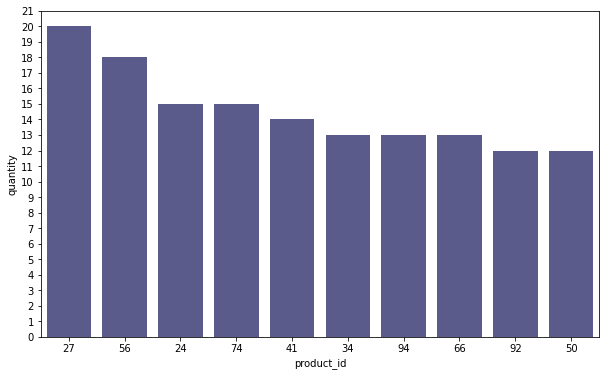

In [24]:
plt.figure(figsize=(10, 6))
plt.yticks([i for i in range(25)])
ax=sns.barplot(x='product_id',\
               y='quantity',\
               data=data_for_barplot,\
               color='midnightblue',\
               alpha=0.75,\
               order=data_for_barplot.sort_values('quantity',ascending = False).product_id)



In [25]:
#Четвертое задание 
#Посмотрим на продажи по дням! 
#Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные 

data_for_barplot2 = all_user_data.groupby('date', as_index=False)\
                                .agg({'quantity' : 'sum'})\
                               
                                

data_for_barplot2

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


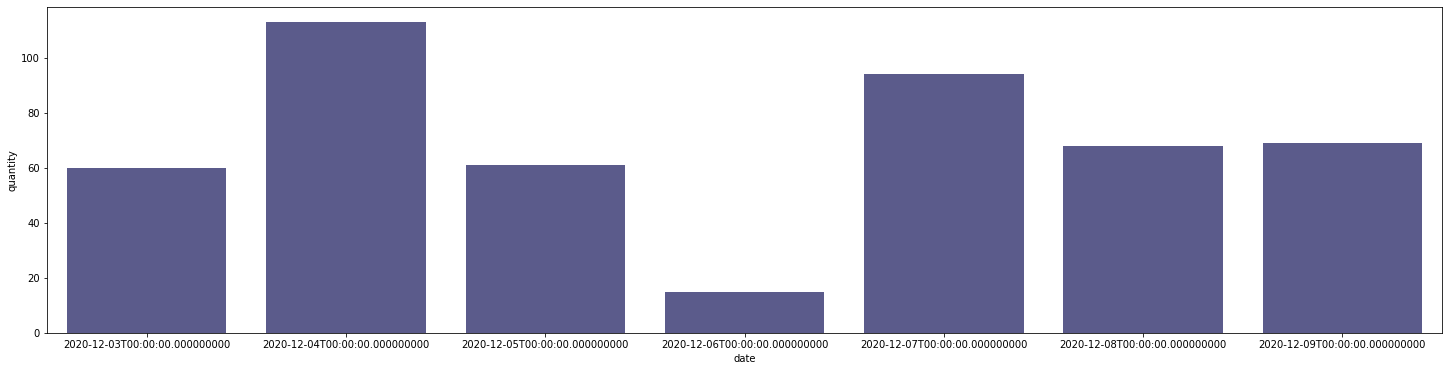

In [26]:
plt.figure(figsize=(25, 6))
ax2=sns.barplot(x='date',\
               y='quantity',\
               data=data_for_barplot2,\
               color='midnightblue',\
               alpha=0.75)

# matplotlib странно отображает даты

In [27]:
#Пятое задание 
#Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
#Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [28]:
all_user_data_duplicates = all_user_data.loc[all_user_data.duplicated(subset=['product_id', 'name','date'])]

all_user_data_duplicates



,product_id,quantity,name,date
140,55,5,Alexey_Smirnov,2020-12-09


In [29]:
all_user_data_duplicates = all_user_data.drop_duplicates(subset=['date', 'name','product_id'])



In [30]:
all_user_data_duplicates.groupby(['name','product_id']).agg({'date':'count'}).query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2


In [31]:
all_user_data.query('name == "Vasiliy_Petrov"').sort_values('product_id')

,product_id,quantity,name,date
21,27,3,Vasiliy_Petrov,2020-12-03
20,78,4,Vasiliy_Petrov,2020-12-03
